In [1]:
import csv
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

%matplotlib inline  

In [2]:
def MahalanobisDist(x, y):
    covariance_xy = np.cov(x,y, rowvar=0)
    inv_covariance_xy = np.linalg.inv(covariance_xy)
    xy_mean = np.mean(x),np.mean(y)
    x_diff = np.array([x_i - xy_mean[0] for x_i in x])
    y_diff = np.array([y_i - xy_mean[1] for y_i in y])
    diff_xy = np.transpose([x_diff, y_diff])
    print(diff_xy)
    
    md = []
    for i in range(len(diff_xy)):
        md.append(np.sqrt(np.dot(np.dot(np.transpose(diff_xy[i]),inv_covariance_xy),diff_xy[i])))
    return md

In [3]:
def randnClusters(M):
    ret = []
    for cluster in M:
        N = cluster[0]
        dim = len(cluster)-1
        data = np.random.randn(N, dim)
        
        for d in range(dim):
            data[:,d] = cluster[1+d][0] * data[:,d] + cluster[1+d][1]
        
        if len(ret) == 0:
            ret = data
        else:
            ret = np.vstack([ret, data])
            
    return ret 

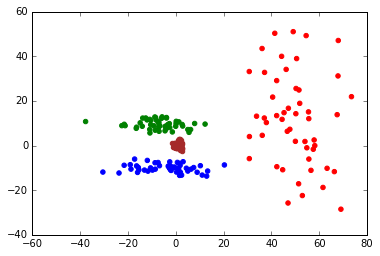

In [4]:
pars = [
    [50, (10,50), (20,10)],
    [50, (10,-5), (2,-10)],
    [50, (10,-5), (2,10)],
]

genClusters = randnClusters(pars)
x,y = genClusters[:,0],genClusters[:,1]
plt.scatter(x,y, color=((['r']*50)+(['b']*50)+(['g']*50)))

covariance_xy = np.cov(x,y, rowvar=0)
A = np.linalg.inv(covariance_xy)
A12 = la.sqrtm(A)

#scaled = ([ np.dot(A12, i) for i in genClusters ])
scaled = np.transpose(np.dot(A12, np.transpose(genClusters)))

#    3 5 7
#    4 6 8
#1 2
#3 4

plt.scatter(scaled[:,0], scaled[:,1], color='brown')
plt.show()

In [5]:
from metric_learn import LMNN
target = ([0]*50)+([1]*50)+([2]*50)

lmnn = LMNN(k=49, verbose=False)
lmnn.fit(genClusters, target)

[[ 1.27811865  0.69000451]
 [ 0.69000451 -1.6590938 ]]


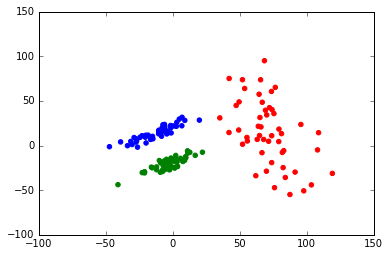

In [6]:
tra = lmnn.transform(genClusters)

#L12 = la.sqrtm(lmnn.L)
#scaled = ([ np.dot(A12, i) for i in genClusters ])
#tra = np.transpose(np.dot(L12, np.transpose(genClusters)))
print(lmnn.L)

plt.scatter(tra[:,0], tra[:,1], color=((['r']*50)+(['b']*50)+(['g']*50)))

[[ 0.90520851  0.02231087 -0.11583061 -0.20074296]
 [-0.01153287  0.78433003 -0.23529192 -0.28114876]
 [-0.18036588 -0.26581595  0.88826448  0.85468377]
 [-0.14705904 -0.28653687  0.81133363  1.32629514]]


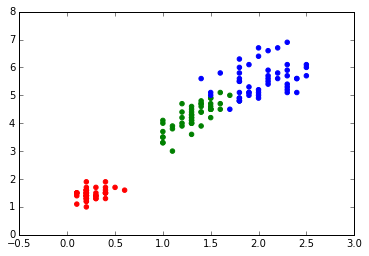

In [7]:
import numpy as np
from metric_learn import LMNN
from sklearn.datasets import load_iris

iris_data = load_iris()
X = iris_data['data']
Y = iris_data['target']

#print(X,Y)

Ycolors = [ "r" if x==0 else "g" if x==1 else "b" for x in Y]

plt.scatter(X[:,3],X[:,2],color=Ycolors)

lmnn = LMNN(k=20, learn_rate=1e-6, verbose=False)
lmnn.fit(X, Y)
print(lmnn.L)

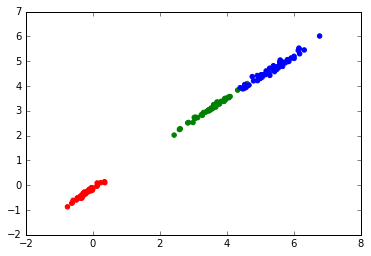

In [8]:
Xt = lmnn.transform(X)

plt.scatter(Xt[:,3],Xt[:,2],color=Ycolors)

In [9]:
import random
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier

#X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.4)

neigh = KNeighborsClassifier(n_neighbors=5)
#neigh.fit(X_train, y_train) 

shuffIndexes = list(range(len(Y)))
random.shuffle(shuffIndexes)
Xshuf = X[shuffIndexes]
Yshuf = Y[shuffIndexes]

#print(neigh.score(X_test, y_test))
scores = cross_validation.cross_val_score(neigh, Xshuf, Yshuf, cv=10)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.9667 (+/- 0.09)
[ 0.93333333  0.93333333  1.          1.          1.          1.
  0.93333333  1.          0.86666667  1.        ]


In [10]:
print(lmnn.metric())
neigh2 = KNeighborsClassifier(n_neighbors=5, metric='mahalanobis', metric_params={'VI':lmnn.metric()})
#neigh2.fit(X_train, y_train) 

#print(neigh2.score(X_test, y_test))
scores = cross_validation.cross_val_score(neigh2, Xshuf, Yshuf, cv=10)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

[[ 0.87369366  0.10123238 -0.38166382 -0.52767127]
 [ 0.10123238  0.76843286 -0.65572266 -0.8322132 ]
 [-0.38166382 -0.65572266  1.51605506  1.92465729]
 [-0.52767127 -0.8322132   1.92465729  2.60888549]]
Accuracy: 0.9733 (+/- 0.09)
[ 1.          0.93333333  1.          1.          1.          1.
  0.93333333  1.          0.86666667  1.        ]


In [11]:
# from modshogun import LMNN as shogun_LMNN

(1797, 64)


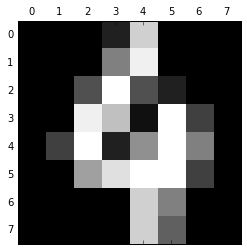

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import pylab as pl 
pl.gray() 
pl.matshow(digits.images[100]) 
pl.show() 

In [13]:
neigh = KNeighborsClassifier(n_neighbors=5)

scores = cross_validation.cross_val_score(neigh, [x.reshape(64) for x in digits.images], digits.target, cv=10)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.9739 (+/- 0.03)
[ 0.92972973  0.98907104  0.97790055  0.97777778  0.96648045  0.98324022
  0.98882682  0.98314607  0.97740113  0.96590909]


In [14]:
lmnn = LMNN(k=20, learn_rate=1e-6, verbose=False)
lmnn.fit(np.array([x.reshape(64) for x in digits.images]), digits.target)

neigh2 = KNeighborsClassifier(n_neighbors=5, metric='mahalanobis', metric_params={'VI':lmnn.L})

scores = cross_validation.cross_val_score(neigh2, [x.reshape(64) for x in digits.images], digits.target, cv=10)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

/home/sveco/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:72: RuntimeWarning: invalid value encountered in sqrt
  return [func(*args, **kwargs) for func, args, kwargs in self.items]
/home/sveco/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:72: RuntimeWarning: invalid value encountered in sqrt
  return [func(*args, **kwargs) for func, args, kwargs in self.items]
/home/sveco/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:72: RuntimeWarning: invalid value encountered in sqrt
  return [func(*args, **kwargs) for func, args, kwargs in self.items]
/home/sveco/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:72: RuntimeWarning: invalid value encountered in sqrt
  return [func(*args, **kwargs) for func, args, kwargs in self.items]
/home/sveco/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:72: RuntimeWarning: invalid value encountered in sqrt
  return [func(

Accuracy: 0.0310 (+/- 0.04)
[ 0.05405405  0.04371585  0.0441989   0.06111111  0.01117318  0.          0.
  0.03932584  0.04519774  0.01136364]


/home/sveco/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:72: RuntimeWarning: invalid value encountered in sqrt
  return [func(*args, **kwargs) for func, args, kwargs in self.items]
/home/sveco/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:72: RuntimeWarning: invalid value encountered in sqrt
  return [func(*args, **kwargs) for func, args, kwargs in self.items]
